# Explore Dates
In this notebook, we're going to explore the dates column, especially the information about minutes. And try to come up with ideas that will improve our accuracy.

In [1]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Load Data

In [5]:
train = pd.read_csv("../data/train.csv", parse_dates=["Dates"])

print(train.shape)
train.head(3)

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


## Extract Year, Month, Day, Hour and Minute from the Dates column

In [34]:
dates = pd.DataFrame(index=train.index)

dates["Dates_year"] = train["Dates"].dt.year
dates["Dates_month"] = train["Dates"].dt.month
dates["Dates_day"] = train["Dates"].dt.day
dates["Dates_hour"] = train["Dates"].dt.hour
dates["Dates_minute"] = train["Dates"].dt.minute
dates["Dates_second"] = train["Dates"].dt.second

dates["Category"] = train["Category"]

print(dates.shape)
dates.head(3)

(878049, 7)


,Dates_year,Dates_month,Dates_day,Dates_hour,Dates_minute,Dates_second,Category
0,2015,5,13,23,53,0,WARRANTS
1,2015,5,13,23,53,0,OTHER OFFENSES
2,2015,5,13,23,33,0,OTHER OFFENSES


## Explore Dates

In [28]:
import seaborn as sns

def format_category(index, value, total_count):
    return "{0}  {1} ({2:.3f}%)".format(index, value, value / total_count * 100)

def plot_by_category(data, column_name, color='r'):
    category_list = data["Category"].value_counts().index
    total_count = data.shape[0]

    f, axes = plt.subplots(10, 4, figsize=(24, 48))

    for i, category in enumerate(category_list):
        category_index = data[data["Category"] == category].index
        category_count = len(category_index)
        dates_values = data.loc[category_index, column_name]
        
        category_label = "{0}  {1} ({2:.3f}%)" \
                            .format(category, category_count, category_count / total_count * 100)

        ax = axes[i / 4, i % 4]

        sns.distplot(dates_values, kde=False, axlabel=category_label, color=color, kde_kws={'bw':.16}, ax=ax)

### Year

/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


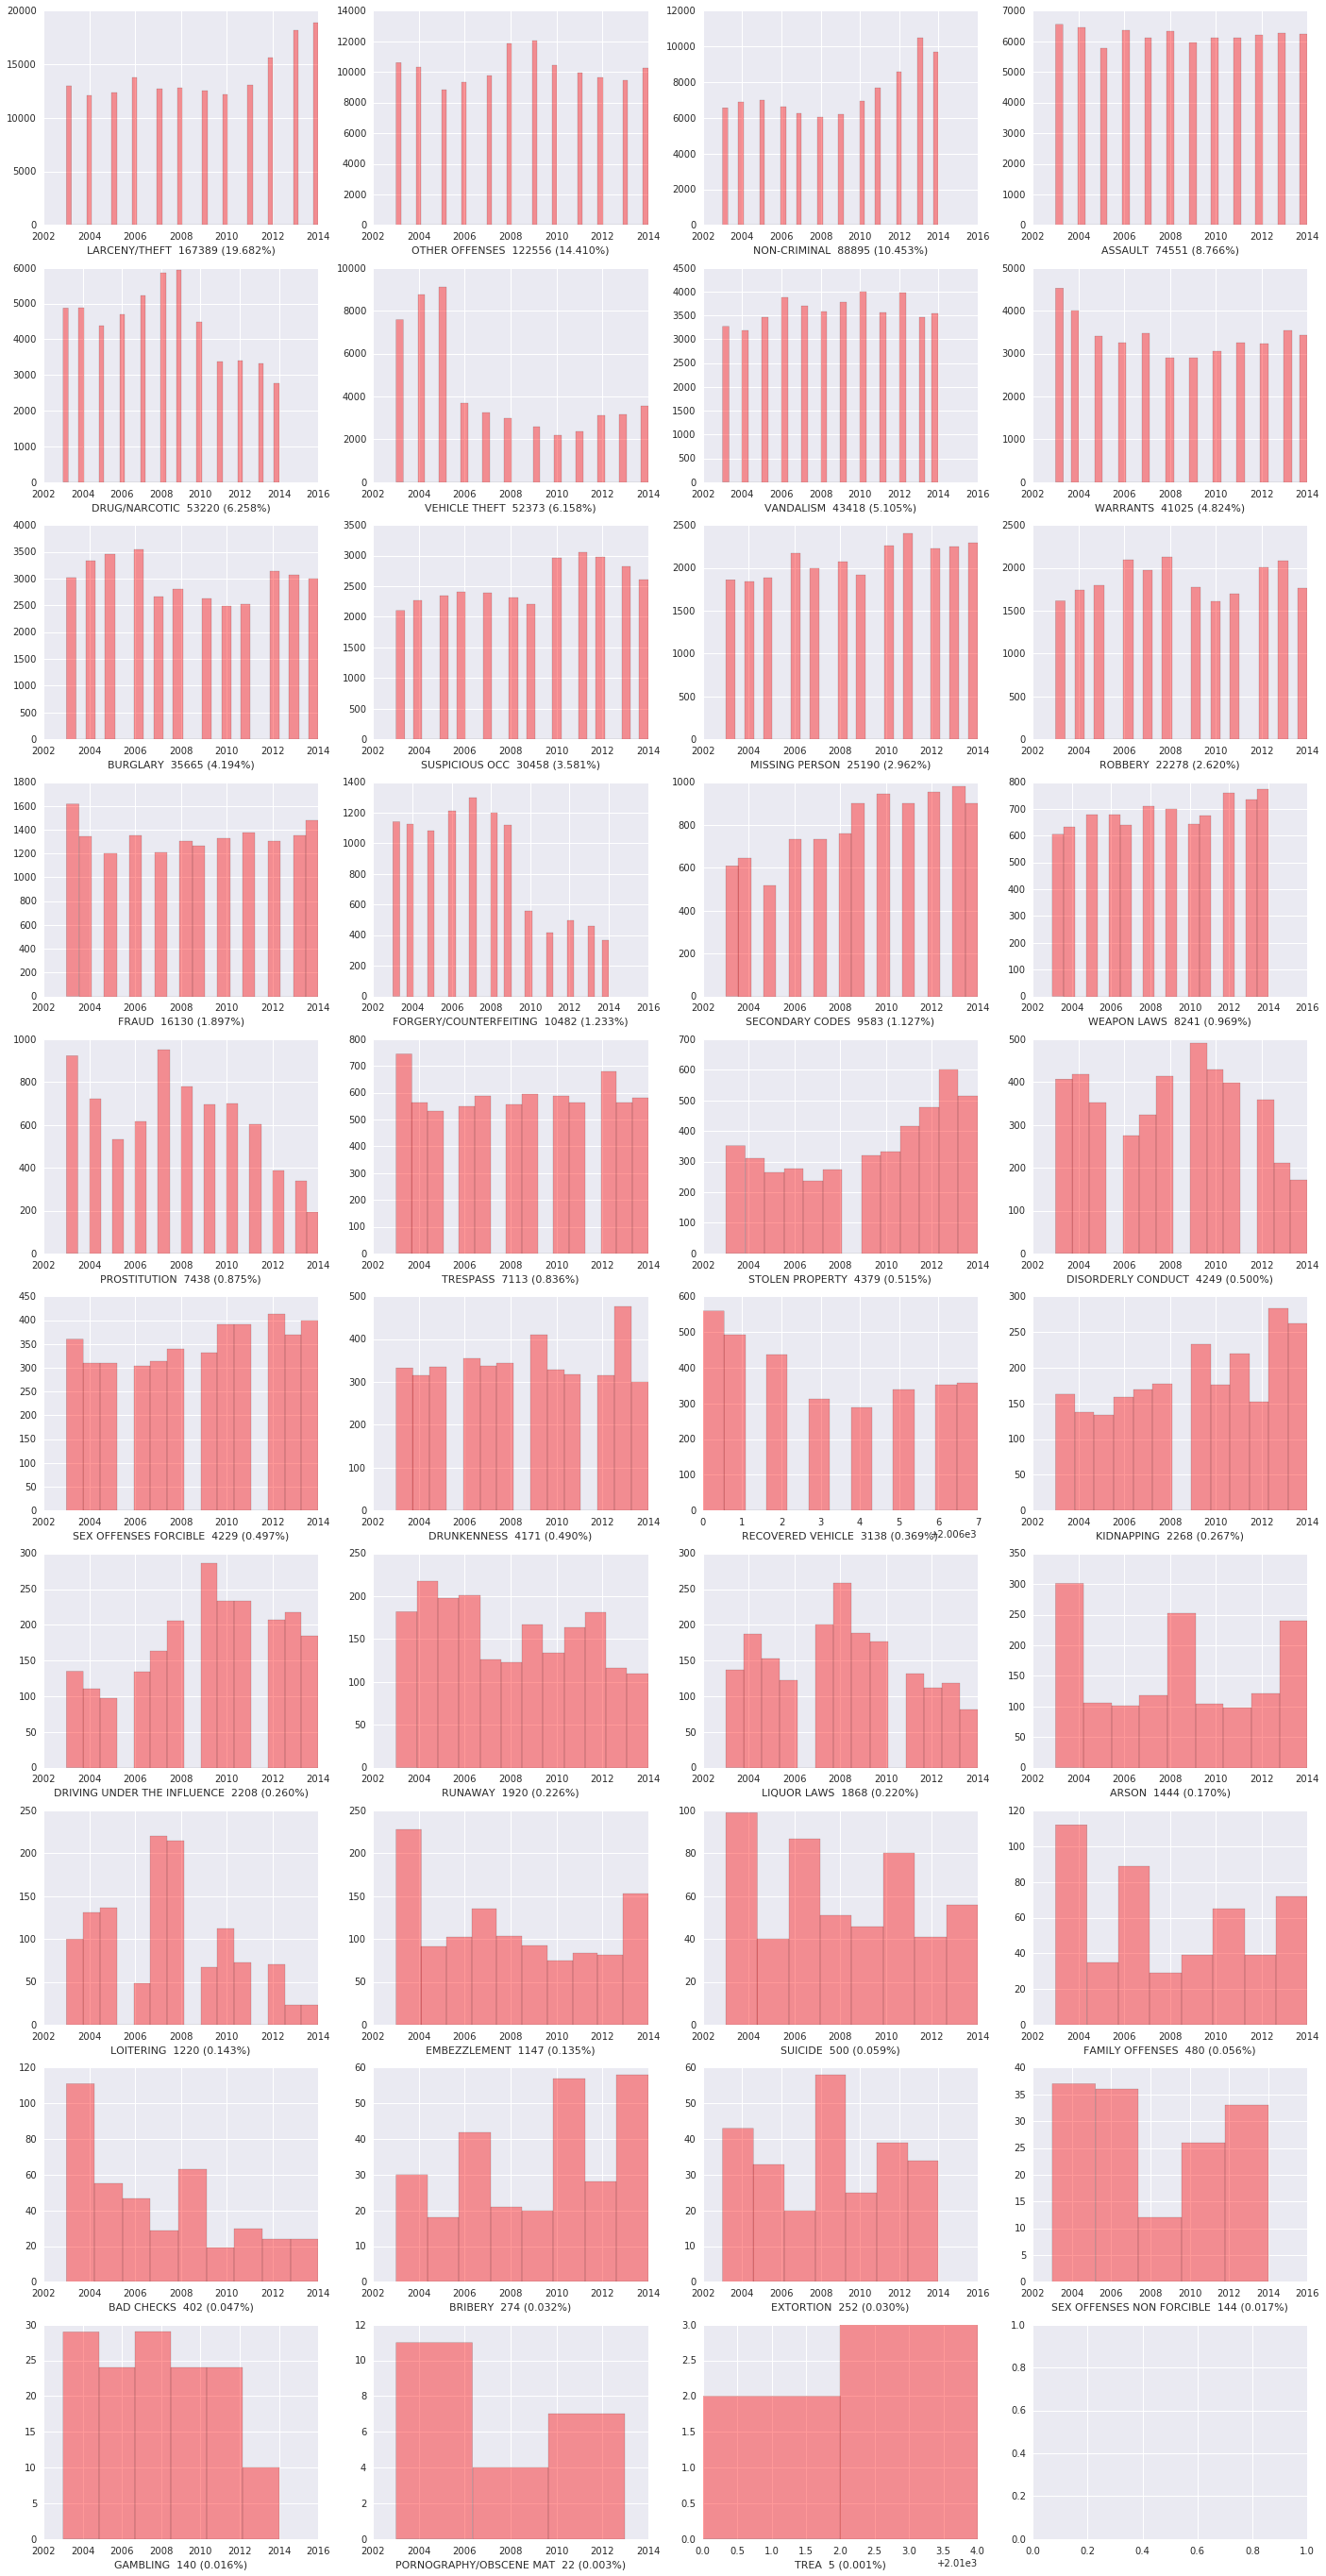

In [36]:
# Ignore 2015 due to it's relatively small dataset.
dates_except_2015 = dates[dates["Dates_year"] < 2015]

plot_by_category(dates_except_2015, "Dates_year", color='r')

### Month

/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


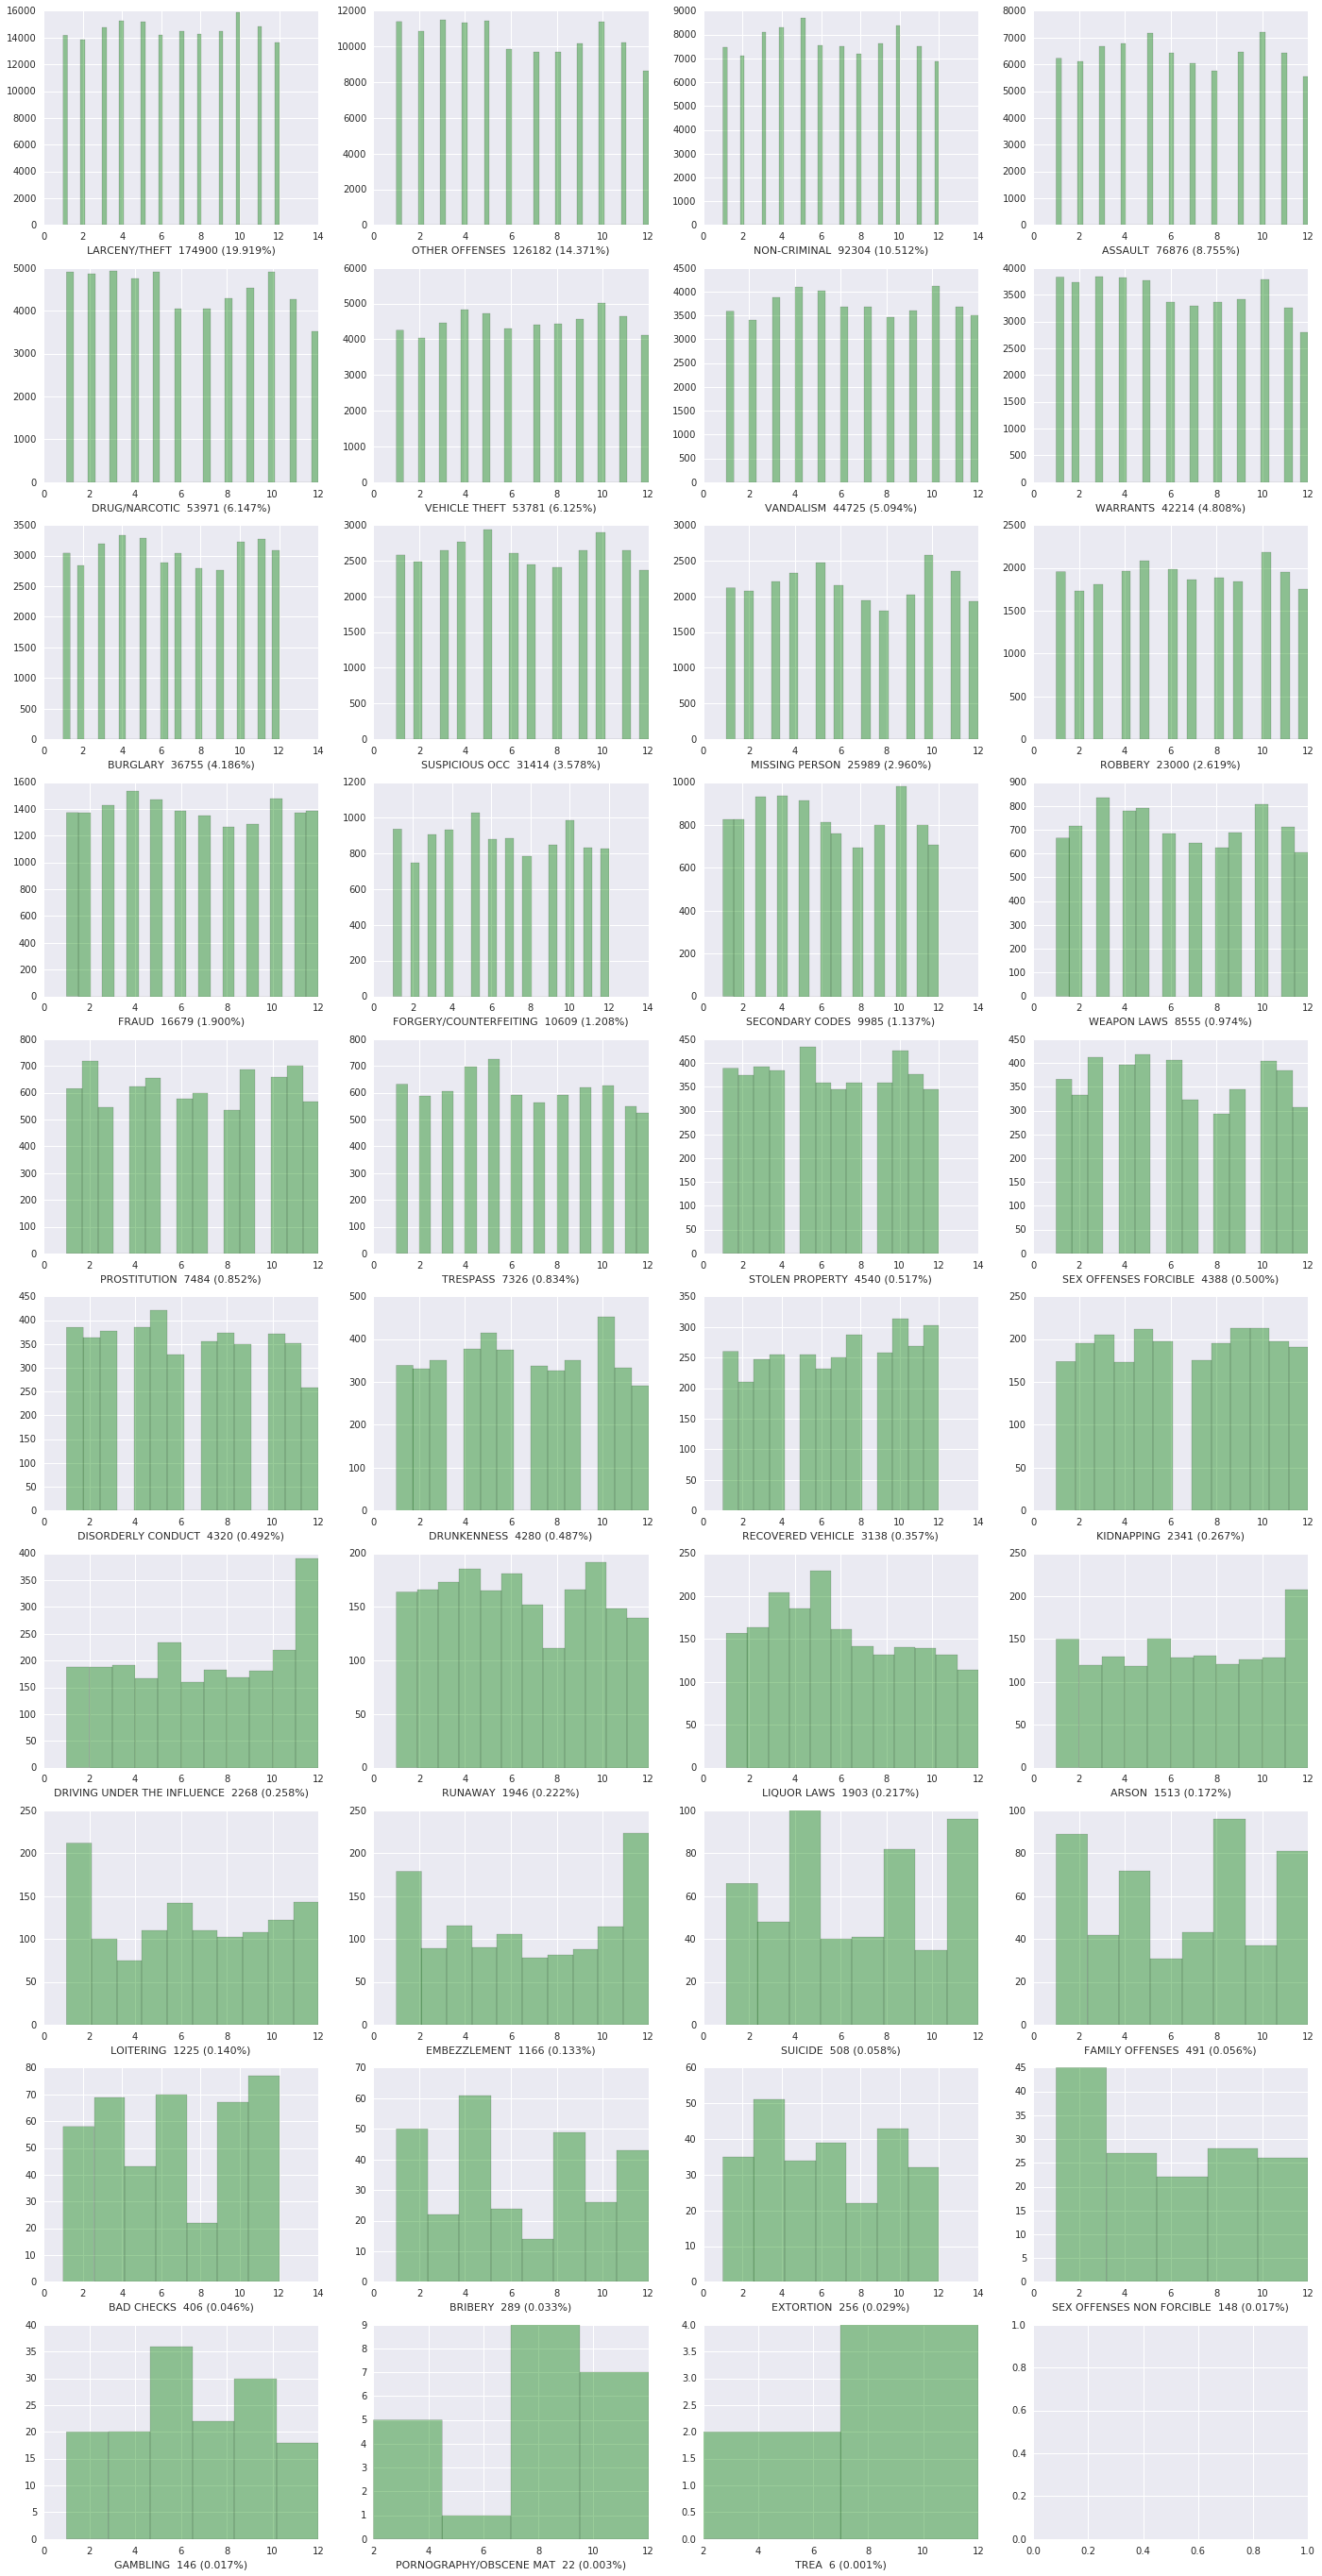

In [37]:
plot_by_category(dates, "Dates_month", color='g')

### Day

/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


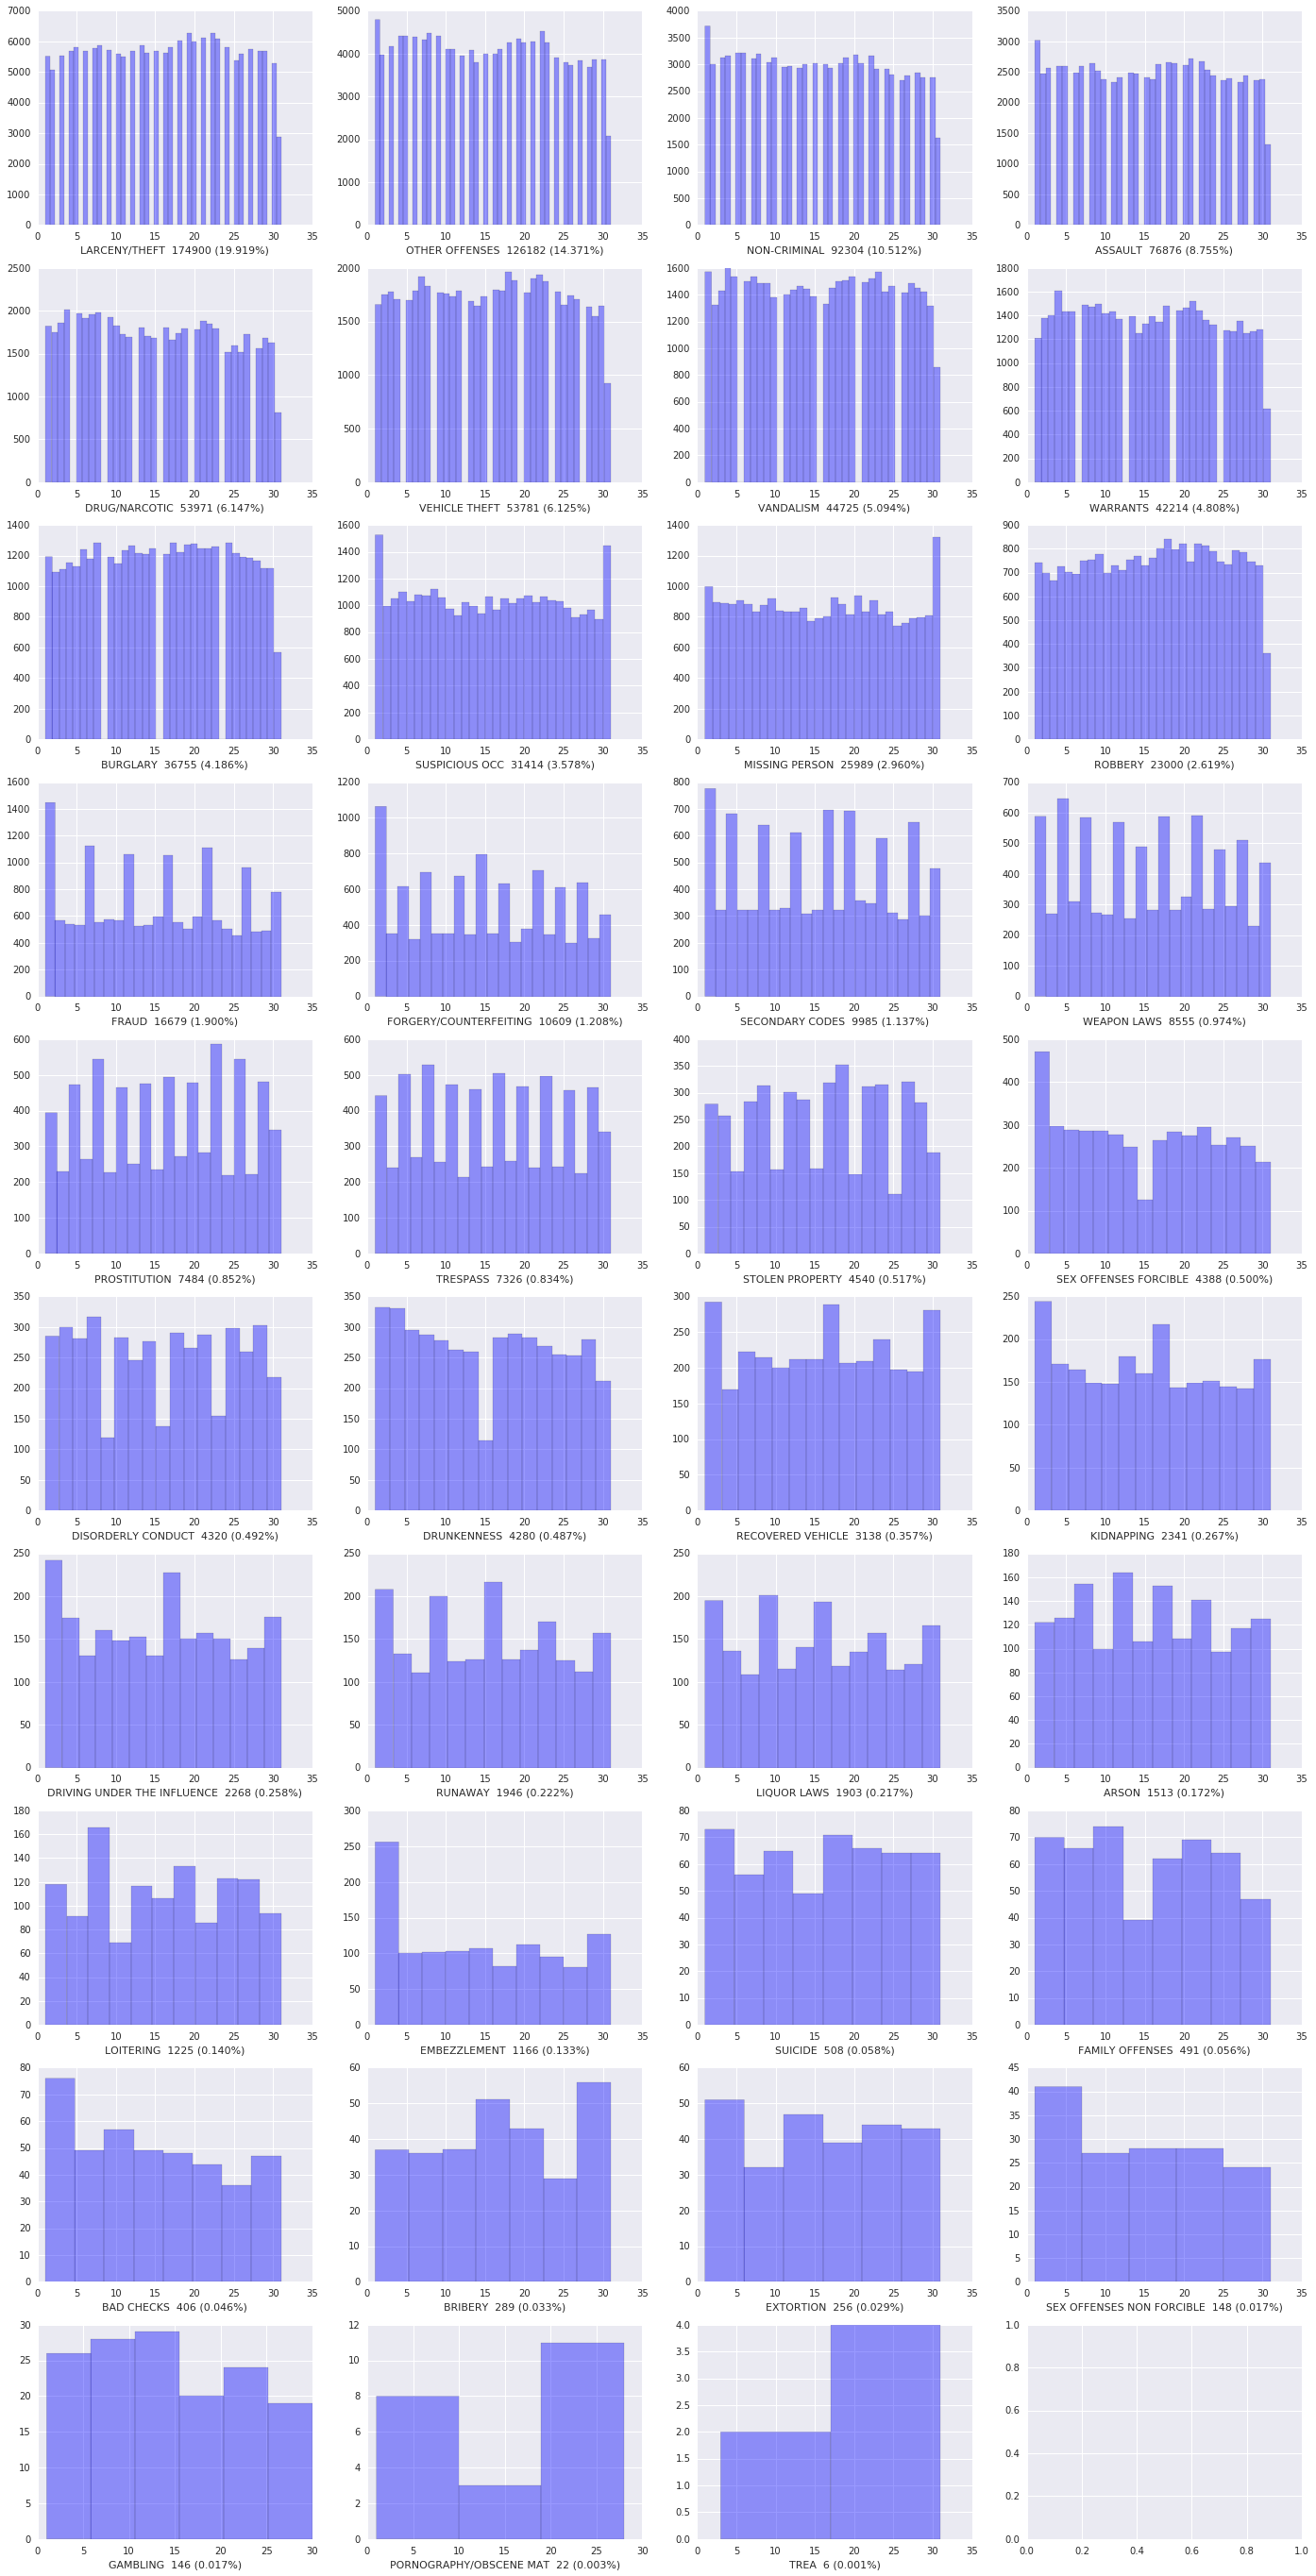

In [38]:
plot_by_category(dates, "Dates_day", color='b')

### Hour

/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


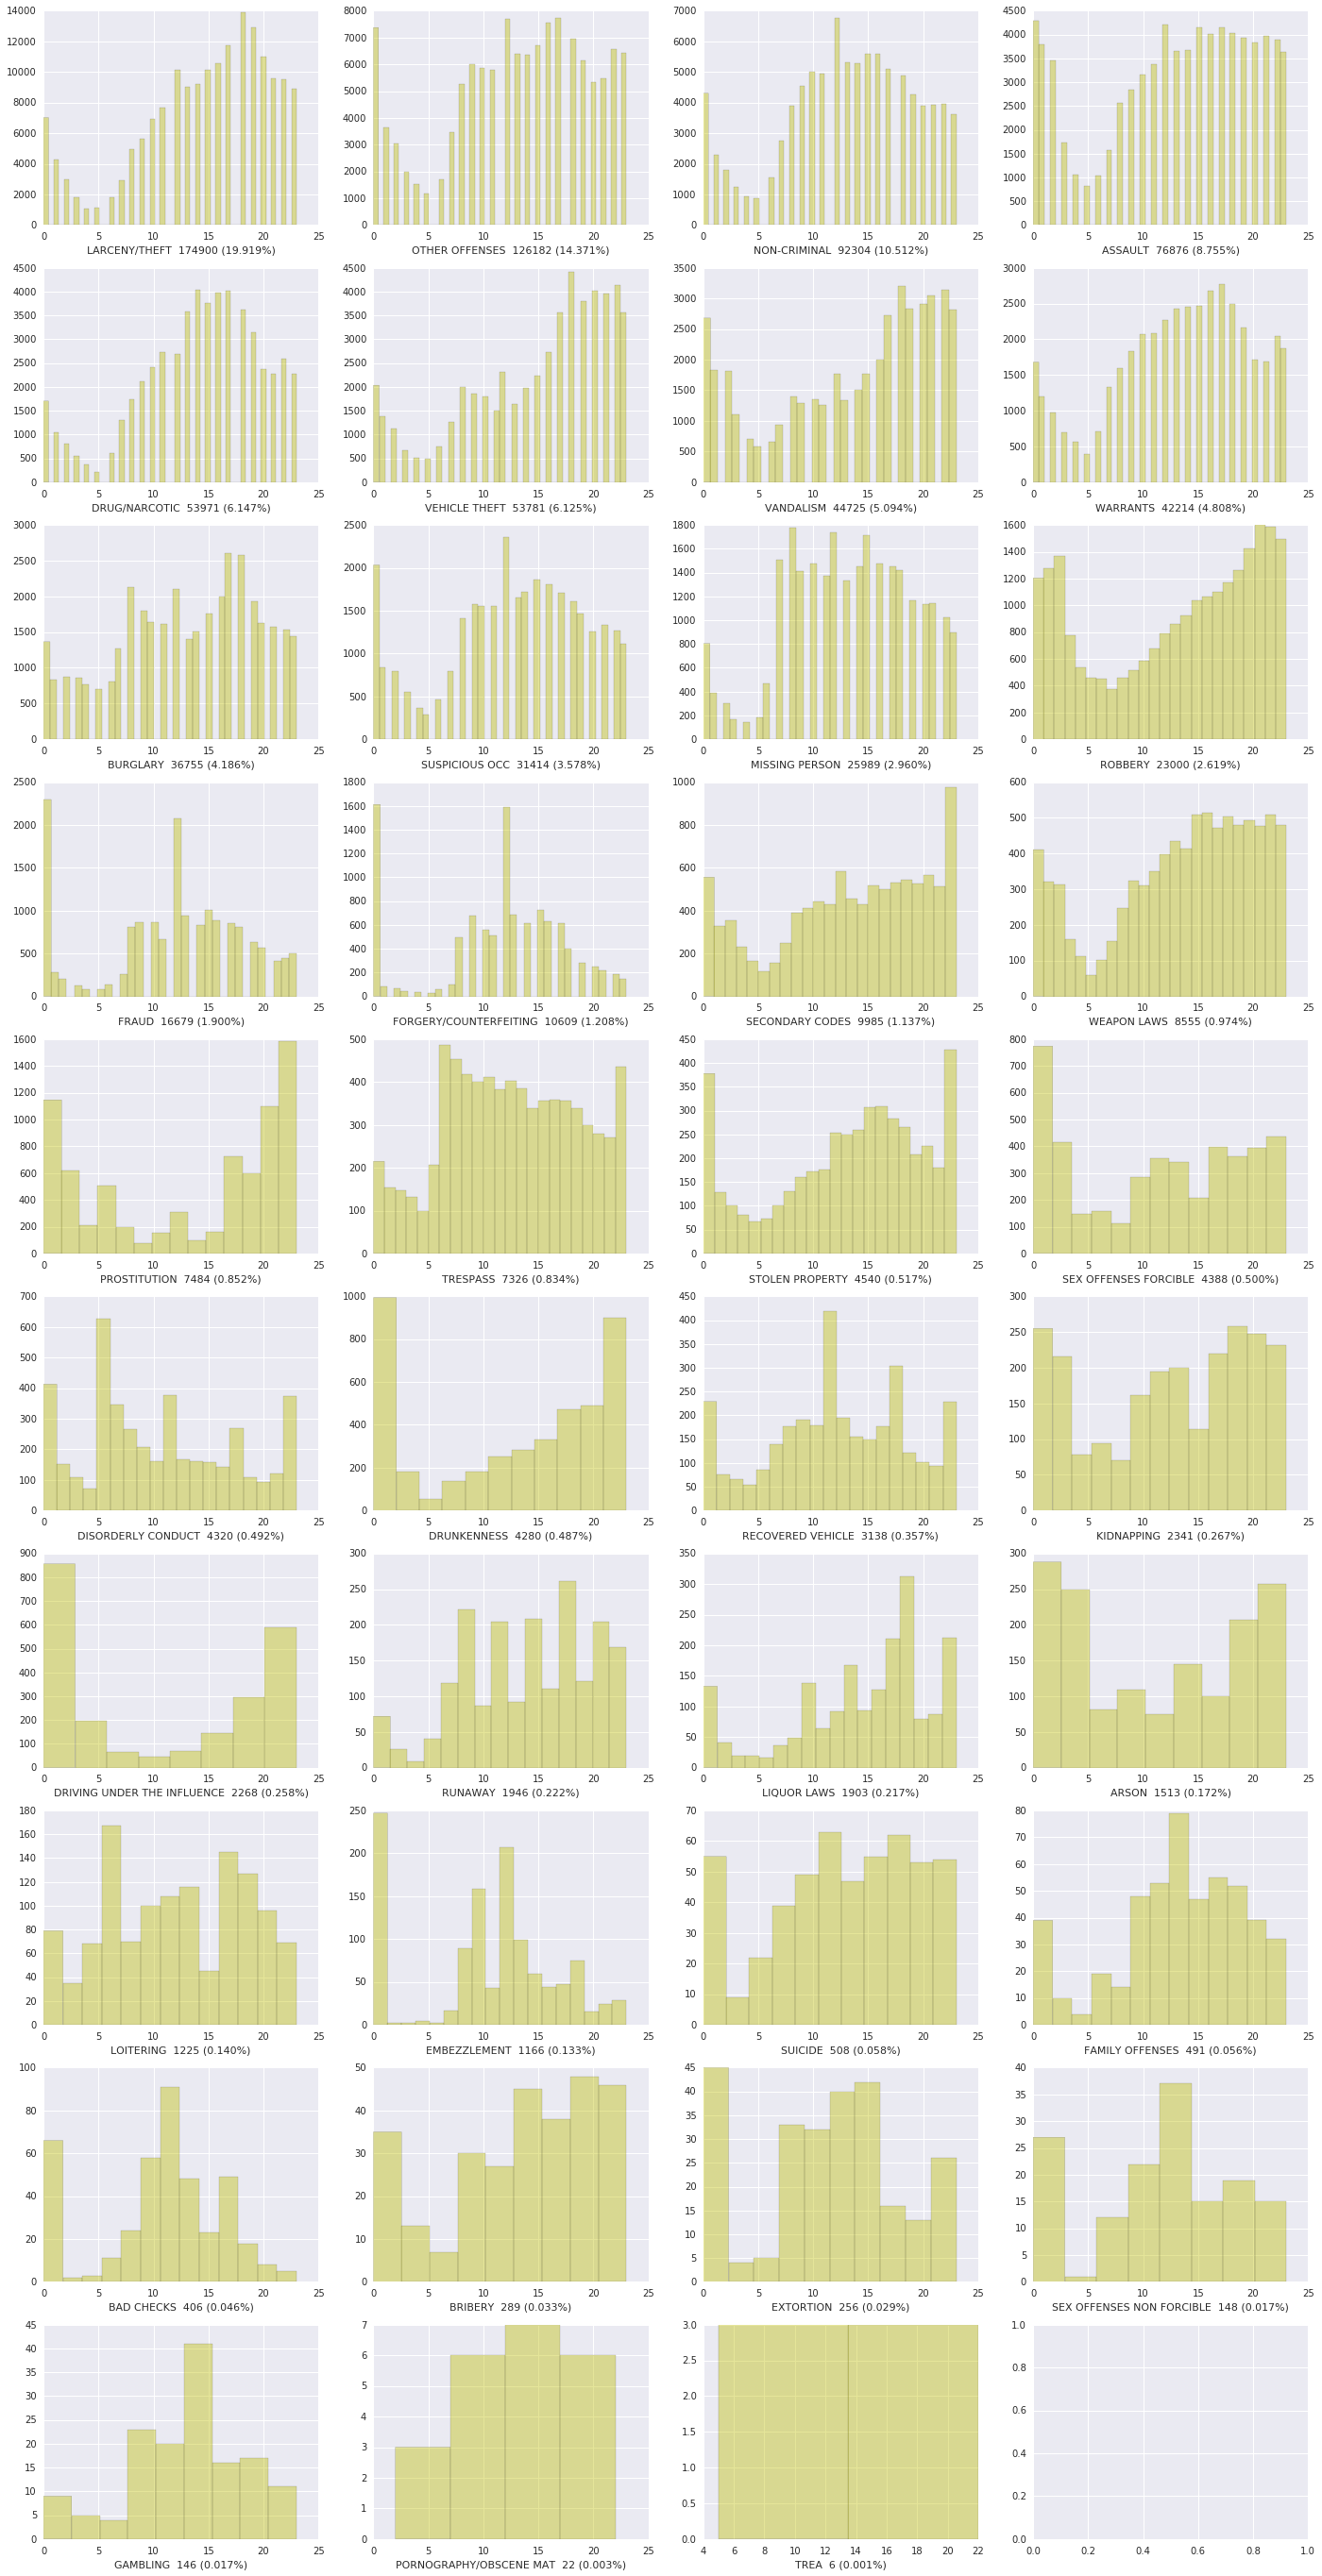

In [39]:
plot_by_category(dates, "Dates_hour", color='y')

### Minute

/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


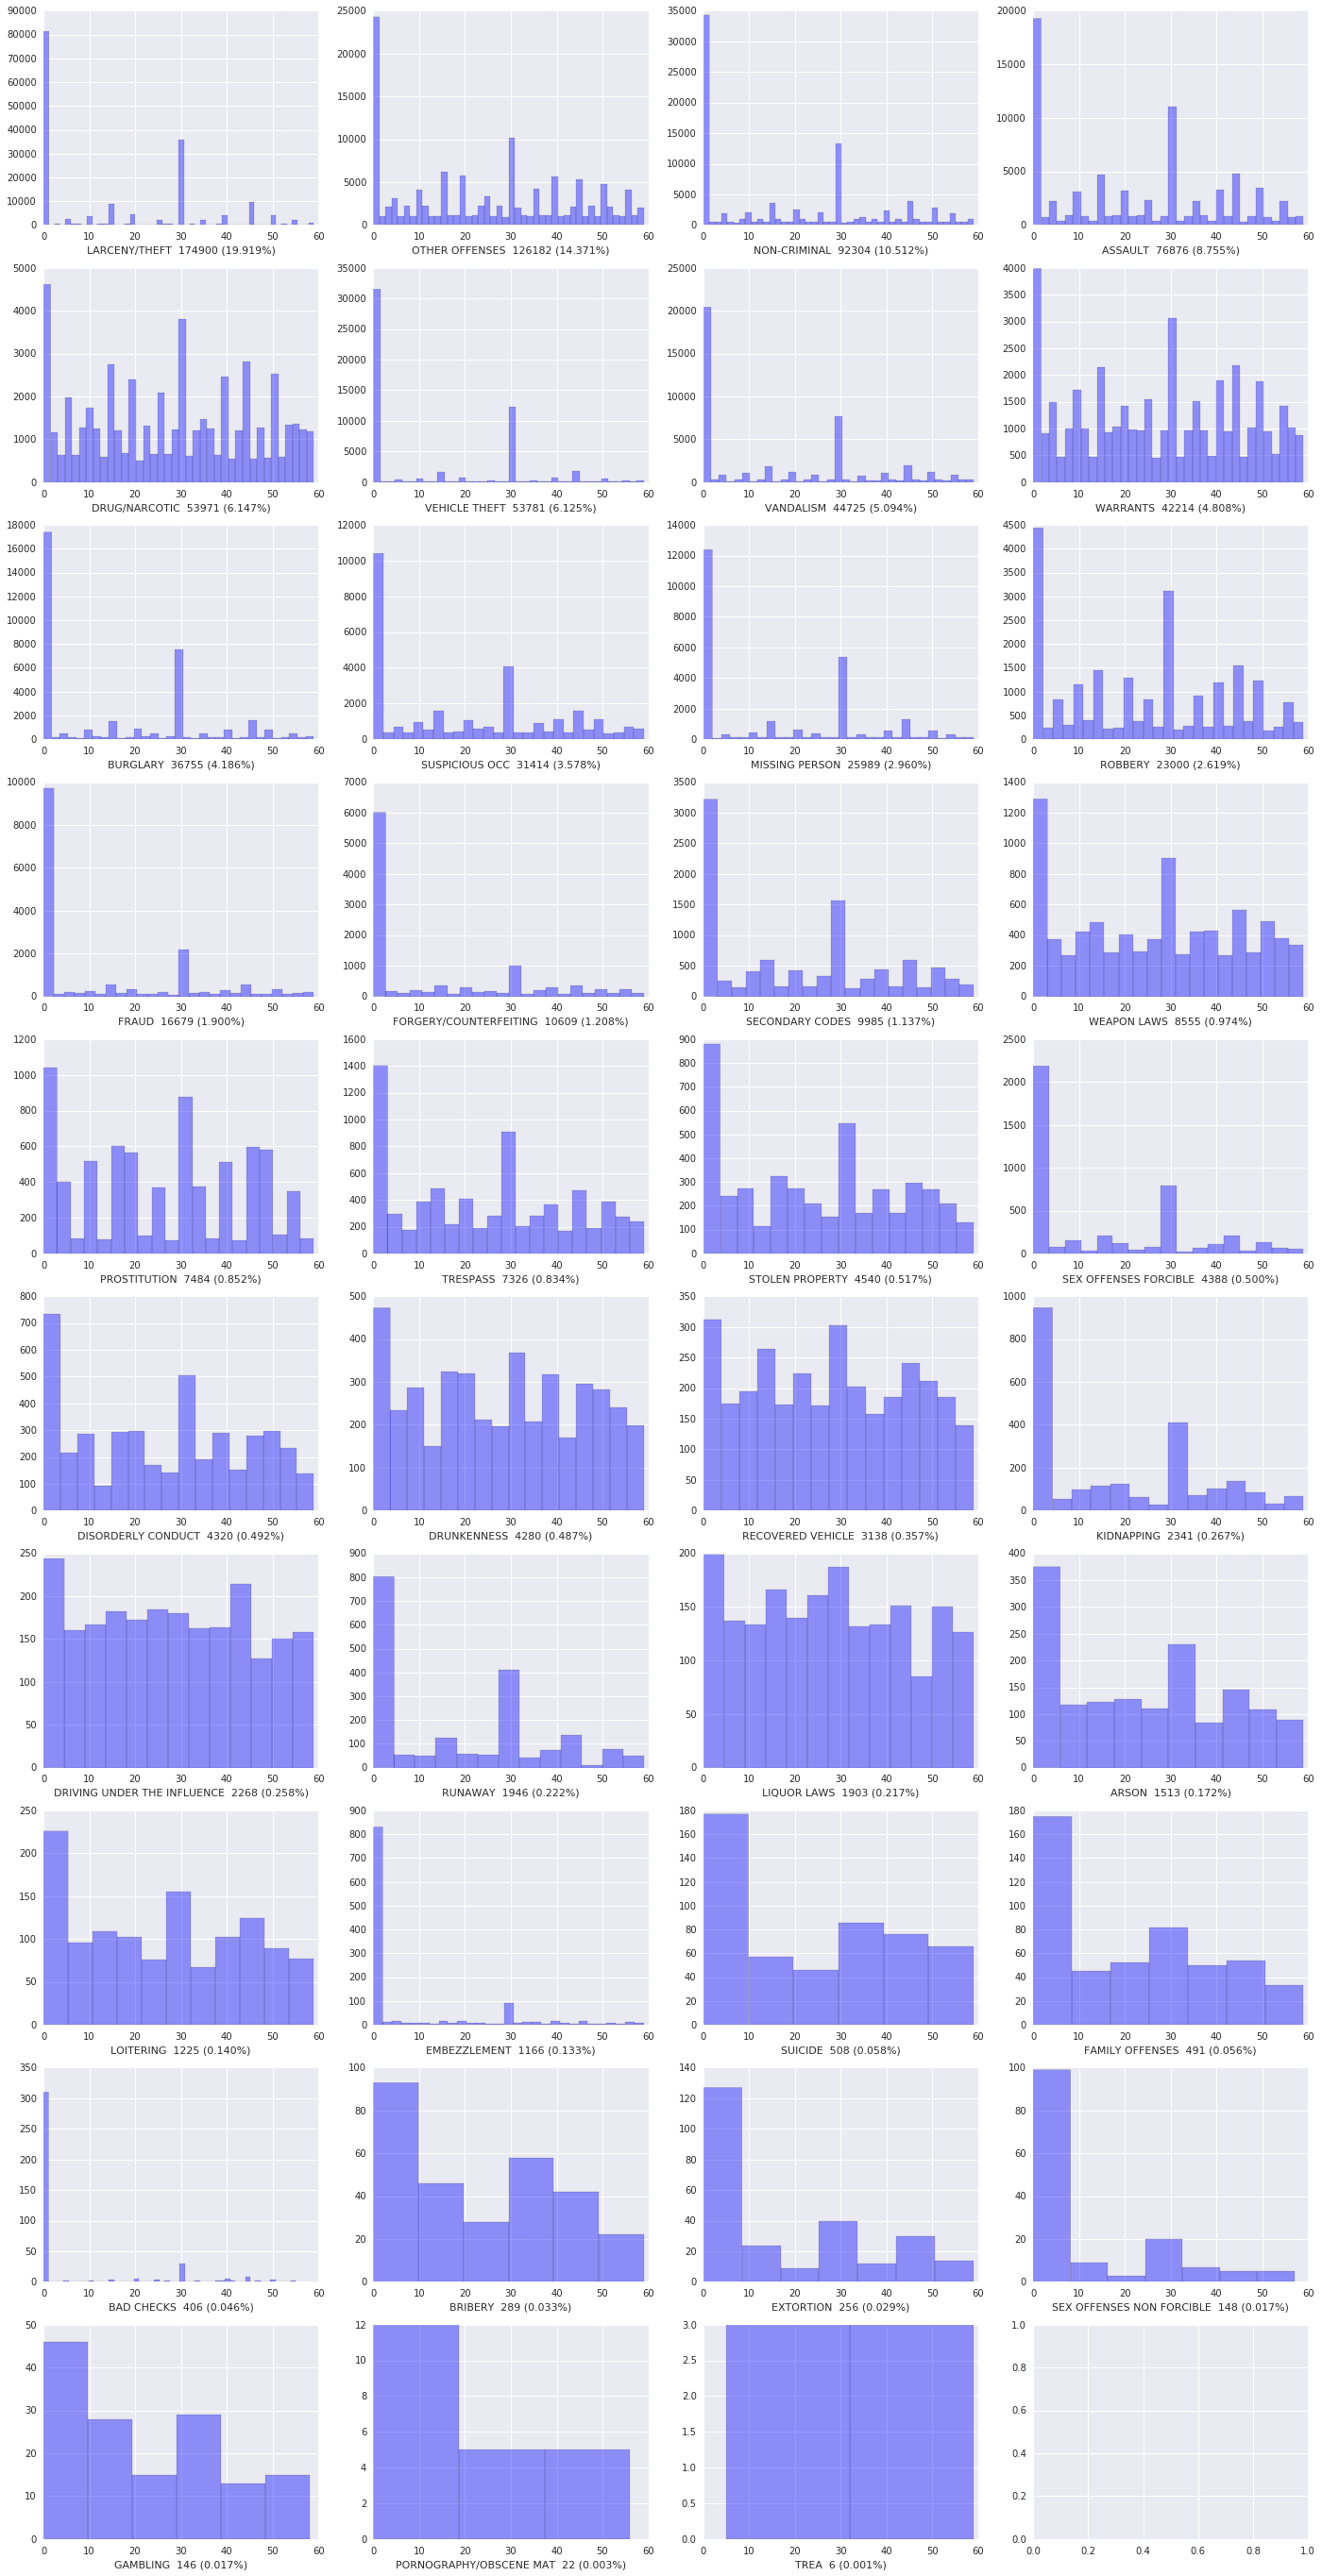

In [40]:
plot_by_category(dates, "Dates_minute", color='b')

### Second

In [43]:
print(dates["Dates_second"].value_counts())

0    878049
Name: Dates_second, dtype: int64


### Observation
  * We found that we have a conspicious about **Dates-Minutes** columns. The distribution of minutes is focusing on 0 and 30. However, we couldn't find exactly why this is happened.
  * We found that all value of **Dates_second** is zero. There is no variance so we don't need to use this as features.